In [21]:
import pandas as pd
import os
for i,j,k in os.walk('xls'):
    pass
dfs = []
cons = []
for i in k:
    df = pd.read_excel('xls\\'+i,header=2)
    dfs.append(df[4:37])
    dfs[-1] = dfs[-1].rename(columns={'Partner country':'partner'})
    cons.append(list(dfs[-1].columns)[2])


In [22]:
dfs[2].head()

,partner,Unnamed: 1,Sweden,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
4,Australia,NaN,19602498,30638683,18703245,39276888,18128310,45911851,7372352,19267292,7312805
5,Austria,NaN,151655864,154609544,154677392,125544040,139528905,169032926,190030732,186319953,135128698
6,Belgium,NaN,577336173,530946352,523988776,452114268,489318223,548260067,641153212,624175625,514698095
7,Canada,NaN,25393351,28851424,25112384,50804522,22718442,26916570,23258445,22442892,36008912
8,Chile,NaN,5843571,10793165,25387901,10107169,6743721,25736405,24169198,5629781,36062890


In [23]:
import numpy as np
matr = np.zeros((38,38))
index_dict = dict()
for i,j in enumerate(cons):
    index_dict[j] = i
for con, df in zip(cons,dfs):
    for partner in cons:
        query = np.array(df.query("partner == '{}'".format(partner)))
        qq = 0. if len(query)==0 or query[0][2]=='..' else query[0][2]
        matr[index_dict.get(con), index_dict.get(partner)] = qq

[[0.         1.96697719 1.9791666  ... 1.9782112  1.95591534 1.58997162]
 [1.96697719 0.         1.9526615  ... 1.97509447 1.7576172  1.97172707]
 [1.9791666  1.9526615  0.         ... 1.84591455 1.9259352  1.98107724]
 ...
 [1.9782112  1.97509447 1.84591455 ... 0.         1.97522632 1.99723325]
 [1.95591534 1.7576172  1.9259352  ... 1.97522632 0.         1.96583055]
 [1.58997162 1.97172707 1.98107724 ... 1.99723325 1.96583055 0.        ]]


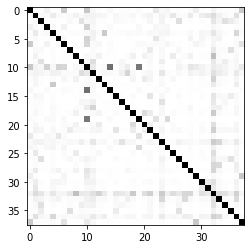

In [59]:
from matplotlib import pyplot as plt
for i in range(38):
    if max(matr[:,i])<1:
        matr[:,i] = matr[i]
matr1 = matr+matr.T
matr2 = np.zeros_like(matr1)
# for i in range(38):
#     matr1[i] /= sum(matr1[i])
for i in range(38):
    for j in range(38):
        matr2[i,j] = sum(matr1[i])+sum(matr1[j])/matr1[i,j]
matr2 = 2-matr2
for i in range(38):
    matr2[i,i] = 0
print(matr2)
plt.imshow(matr2,cmap='gray')
plt.show()

In [41]:
dff = pd.DataFrame(matr,columns=cons)
dff.to_csv('data.csv', header=cons,index=None)

In [60]:
dff1 = pd.DataFrame(matr2,columns=cons)
dff1.to_csv('data1.csv', header=cons,index=None)